# Scikit-learn 2

Evaluation metrics, cross-validation and parameter optimization.

## 0 So, who has implemented accuracy?

## 1 Simple evaluation for a regression problem

For a _regression_ problem, accuracy is not a meaningful measure of performance.

**Question for you: Why?**

Load a regression dataset, this is all review from last time:

In [10]:
# load a regression dataset, same as last time
from sklearn.datasets import load_boston
boston = load_boston()

X = boston.data
y = boston.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# check shapes
for v in (X_train, X_test, y_train, y_test):
    print v.shape

(404, 13)
(102, 13)
(404,)
(102,)


In [11]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train, y_train)

# check parameters of the estimator
print clf

y_pred = clf.predict(X_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


### Mean absolute error

A popular and simple way to evaluate regression models are variants of **mean error**. For each pair of true y value of predicted value, "error" simply means the difference between the true and predicted value. Of all those error values, you can simply take the mean:

In [13]:
from sklearn.metrics import mean_absolute_error
print mean_absolute_error(y_test, y_pred)

3.74913846814


We can verify that this functions works the way we described it above:

In [16]:
import numpy
error = numpy.abs(y_test - y_pred)
error.mean()

3.7491384681430215

In [23]:
# what is the lowest possible error?
mean_absolute_error(y_test, y_test)

0.0

**Question for you: what is the highest possible mean absolute error?**

### Mean squared error

Mean absolute error gives equal weight for errors of any size. But intuitively, errors can be small or large, and large deviations from the true values are worse than almost getting the correct result. **Mean squared error** puts this idea into practice. Incidentally, squaring the differences also gets rid of negative error values.

In [25]:
from sklearn.metrics import mean_squared_error
print mean_squared_error(y_test, y_pred)

23.3745630297


### Root mean squared error (RMSE)

Finally, you can take the root of the mean squared error (RMSE), as follows. RMSE is an important measure of regression error, and relatively easy, as long as you remember to apply everything backwards (compute error, square the differences, then take the mean, then take the square root).

In [24]:
print numpy.sqrt(mean_squared_error(y_test, y_pred))

4.83472471085


Taking the square root at the very end is similar to taking the square root to obtain standard deviation from variance.

## 2 Cross-validation

Until now, we have assigned observations to the training or test set at random. This creates some unwanted variance, as our model could be trained on easy examples and tested on hard ones, or vice versa - purely by chance. Cross-validation is a method to overcome this difficulty.

In [34]:
# load classification dataset, all review
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

### Notion of data folds

The procedure builds on a class called `KFold`:

In [40]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)
indexes = kf.split(X, y)
print indexes
for train_indexes, test_indexes in indexes:
    print train_indexes, test_indexes

<generator object split at 0x10d0477d0>
[  0   1   2   3   5   6   8  10  11  12  13  14  15  16  17  19  22  24
  25  27  28  29  30  31  32  33  35  36  37  39  40  41  42  43  44  45
  46  48  50  51  52  53  54  55  57  58  59  60  61  62  63  64  65  66
  69  70  71  72  73  74  75  77  78  81  82  83  84  85  86  87  88  89
  91  93  94  95  96  99 100 101 102 103 104 105 107 108 109 110 111 113
 114 115 116 117 118 119 120 121 122 124 127 128 129 130 131 133 135 136
 137 138 140 141 142 143 144 145 146 147 148 149] [  4   7   9  18  20  21  23  26  34  38  47  49  56  67  68  76  79  80
  90  92  97  98 106 112 123 125 126 132 134 139]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  14  15  16  17  18
  20  21  22  23  24  25  26  28  30  31  32  33  34  36  38  39  40  41
  42  43  44  45  46  47  49  50  52  53  54  56  57  58  60  61  62  64
  66  67  68  70  72  73  74  75  76  77  78  79  80  81  84  86  87  88
  89  90  92  94  95  96  97  98 100 101 102 103 104 105 

The `split` method of a `KFold` object returns lists of indexes that can be used to index the `X` and `y` arrays:

In [44]:
# exploiting the fact that loop variables leak into the outer environment
print train_indexes
print
print X[train_indexes]

[  0   1   2   4   6   7   8   9  10  12  13  14  15  16  17  18  19  20
  21  22  23  24  26  27  28  29  31  32  33  34  35  36  37  38  39  40
  41  42  44  46  47  48  49  50  51  53  54  55  56  57  58  59  63  64
  65  67  68  69  70  71  72  73  74  76  79  80  82  83  84  85  86  87
  88  89  90  91  92  93  94  96  97  98  99 100 101 102 103 104 106 107
 110 111 112 114 115 119 120 121 122 123 124 125 126 128 129 131 132 134
 135 137 138 139 141 142 143 145 146 147 148 149]

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.

### Automatic folds and cross-validation

The process of assigning observations to folds, training models and testing them on the respective portion that was held out (the examples at the test set indexes) can be automated of course.

In [51]:
# First decide on an estimator
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50, )) # `hidden_layer_sizes` is a hyperparameter
print mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [52]:
# 10-fold cross-validation with `cross_val_score`
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp, X, y, cv=10, scoring='accuracy')
print scores

[ 1.          1.          1.          0.86666667  0.8         1.
  0.86666667  1.          1.          1.        ]


This gives an accuracy score for each time data was split into training and testing examples. Averaging them will give a better (= more smooth) estimate of generalization, or "out-of-sample performance":

In [53]:
scores.mean()

0.95333333333333337

**Question for you: what is a reasonable number of folds k, for k-fold cross validation?**

## 3 Automated search for hyperparameters

Until now, when we initialized estimators (like KNN, or MLP) we simply brushed over the fact that certain parameters need to be set. For instance, KNN needs the number of neighbors `n_neighbors`, and an MLP very typically needs to know the dimensions of hidden layers, `hidden_layer_sizes`.

Using the toolset we have aquired until now, we can loop over different values of those so-called **hyperparameters** and get a mean cross-validation score in each iteration:

In [87]:
# search for an optimal value of hidden layer size for MLP:
layer_size_range = range(20, 110, 10)
print layer_size_range

mean_scores = []

for s in layer_size_range:
    mlp = MLPClassifier(hidden_layer_sizes=(s))
    score = cross_val_score(mlp, X, y, cv=10, scoring='accuracy')
    mean_scores.append(score.mean())

print mean_scores

[20, 30, 40, 50, 60, 70, 80, 90, 100]
[0.81999999999999995, 0.93333333333333335, 0.92666666666666675, 0.96666666666666656, 0.95999999999999996, 0.97333333333333338, 0.98666666666666669, 0.96666666666666679, 0.97333333333333338]


As you can see, setting the hyperparameter `hidden_layer_sizes` to a reasonable value is crucial to get a good accuracy score:

Text(0,0.5,u'Cross-validated accuracy')

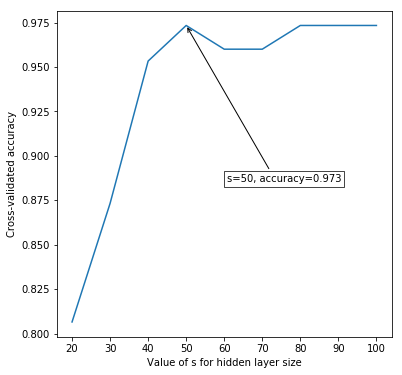

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,6))

plt.plot(layer_size_range, mean_scores)

def annot_max(x,y, ax=None):
    """
    This code is adapted from:
    https://stackoverflow.com/a/43375318/1987598
    """
    xmax = x[numpy.argmax(y)]
    ymax = max(y)
    text= "s={}, accuracy={:.3f}".format(xmax, ymax)
    if not ax:
        ax = plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops = dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=-60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.85,0.50), **kw)

annot_max(layer_size_range, mean_scores)

plt.xlabel('Value of s for hidden layer size')
plt.ylabel('Cross-validated accuracy')

Which means that if we choose arbitrary values for hyperparameters, it is likely that performance will suffer. Still, we would not want to search for optimal values manually, `scikit-learn` offers methods to automatically search for them.

**Question for you: in your opinion, is the choice of classifier itself a hyperparameter that should be optimized?**

### Grid search for hyperparameter values

A straightforward way to search for an optimal hyperparameter value ("hyperparameter tuning") is to define the set of values that should be tried and from this set choose the one that gives the highest cross-validation score. If several hyperparameters need to be optimized, all permutations need to be tried. This method is called **grid search**.

We now employ grid search with cross-validation to automate the procedure above that finds an optimal value for MLP hidden layer size:

In [107]:
from sklearn.model_selection import GridSearchCV

layer_size_range = range(20, 110, 10)

# define parameters whose value space needs to be searched
param_grid = {'hidden_layer_sizes': layer_size_range}
print param_grid

# create estimator object, default values
mlp = MLPClassifier()

# instantiate grid search class
grid = GridSearchCV(mlp, param_grid, cv=10, scoring='accuracy', n_jobs=2, return_train_score=True)

# fit iris data (reload if you modified those variables)
grid.fit(X, y)

{'hidden_layer_sizes': [20, 30, 40, 50, 60, 70, 80, 90, 100]}


GridSearchCV(cv=10, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'hidden_layer_sizes': [20, 30, 40, 50, 60, 70, 80, 90, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

Results are stored in `grid.cv_results_`, which can be converted to a pandas data frame for inspection:

In [120]:
# a bit unwieldy
# print grid.cv_results_

# better with pandas
import pandas as pd
df = pd.DataFrame.from_dict(grid.cv_results_)
df.sort_values(by=["rank_test_score"])

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_hidden_layer_sizes,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,split5_test_score,split5_train_score,split6_test_score,split6_train_score,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
8,0.144219,0.000438,0.980000,0.978519,100,{u'hidden_layer_sizes': 100},1,1.0,0.977778,1.000000,0.985185,1.000000,0.977778,0.933333,0.977778,0.933333,0.985185,1.000000,0.977778,0.933333,0.985185,1.000000,0.977778,1.000000,0.970370,1.0,0.970370,0.008386,0.000047,0.030551,0.005185
6,0.096226,0.000298,0.973333,0.971852,80,{u'hidden_layer_sizes': 80},2,1.0,0.977778,1.000000,0.970370,1.000000,0.962963,0.933333,0.970370,0.933333,0.977778,1.000000,0.977778,0.866667,0.962963,1.000000,0.970370,1.000000,0.970370,1.0,0.977778,0.006933,0.000044,0.044222,0.005543
4,0.087924,0.000294,0.966667,0.971852,60,{u'hidden_layer_sizes': 60},3,1.0,0.970370,1.000000,0.977778,1.000000,0.970370,0.933333,0.977778,0.866667,0.962963,0.933333,0.970370,0.933333,0.977778,1.000000,0.962963,1.000000,0.970370,1.0,0.977778,0.004070,0.000033,0.044721,0.005543
5,0.090802,0.000281,0.966667,0.970370,70,{u'hidden_layer_sizes': 70},3,1.0,0.948148,1.000000,0.970370,1.000000,0.970370,0.933333,0.970370,0.866667,0.977778,1.000000,0.977778,0.866667,0.977778,1.000000,0.970370,1.000000,0.970370,1.0,0.970370,0.002809,0.000004,0.053748,0.008114
7,0.147408,0.000422,0.966667,0.975556,90,{u'hidden_layer_sizes': 90},3,1.0,0.970370,0.933333,0.962963,1.000000,0.970370,0.933333,0.970370,0.866667,0.985185,1.000000,0.977778,0.933333,0.985185,1.000000,0.977778,1.000000,0.977778,1.0,0.977778,0.006476,0.000030,0.044721,0.006667
3,0.086528,0.000284,0.960000,0.965185,50,{u'hidden_layer_sizes': 50},6,1.0,0.962963,1.000000,0.962963,1.000000,0.955556,0.866667,0.948148,0.866667,0.977778,1.000000,0.970370,0.866667,0.977778,1.000000,0.970370,1.000000,0.955556,1.0,0.970370,0.003677,0.000021,0.061101,0.009399
2,0.096704,0.000331,0.946667,0.964444,40,{u'hidden_layer_sizes': 40},7,1.0,0.955556,1.000000,0.955556,1.000000,0.970370,0.933333,0.970370,0.866667,0.985185,0.866667,0.948148,0.866667,0.985185,0.933333,0.955556,1.000000,0.948148,1.0,0.970370,0.014279,0.000082,0.058119,0.013168
1,0.090175,0.000302,0.926667,0.910370,30,{u'hidden_layer_sizes': 30},8,1.0,0.955556,1.000000,0.970370,0.800000,0.859259,0.933333,0.977778,0.800000,0.851852,0.866667,0.874074,0.933333,0.770370,1.000000,0.955556,0.933333,0.940741,1.0,0.948148,0.012600,0.000029,0.075719,0.064444
0,0.077719,0.000364,0.833333,0.823704,20,{u'hidden_layer_sizes': 20},9,1.0,0.940741,1.000000,0.948148,0.733333,0.725926,0.733333,0.725926,0.666667,0.688889,0.800000,0.859259,0.666667,0.703704,0.866667,0.859259,0.866667,0.896296,1.0,0.888889,0.003095,0.000112,0.127366,0.096399


In the course of grid search, the grid is automatically refit with the best parameter values and all of the training examples (so that you would not waste data). Predictions can be made directly with the `grid` objec, in the usual fashion:

In [110]:
grid.predict([[0.2, 0.5, 0.6, 0.8]])

array([2])

### Random search as an efficient approximation to grid search

For large models, a high number of parameters or high range of values, grid search can be computationally expensive. Searching for values would be more efficient if it were not _exhaustive_, that is, if only a subset of value combinations would be cross-validated. Such a method is called **random(ized) search**.

In [115]:
from sklearn.model_selection import RandomizedSearchCV

# bigger search space
layer_size_range = range(20, 110, 10)
solver_values = ['lbfgs', 'sgd', 'adam']
learning_rate_init_values = [0.1, 0.01, 0.001, 0.0001]

# define parameters whose value space needs to be searched
param_grid = {'hidden_layer_sizes': layer_size_range,
              'solver': solver_values,
              'learning_rate_init': learning_rate_init_values}

random_search = RandomizedSearchCV( estimator=mlp,
                                    param_distributions=param_grid,
                                    n_iter=10,
                                    cv=10,
                                    scoring='accuracy',
                                    n_jobs=2,
                                    return_train_score=True,
                                    random_state=42)

# fit iris data (reload if you modified those variables)
random_search.fit(X, y)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=2,
          param_distributions={'solver': ['lbfgs', 'sgd', 'adam'], 'learning_rate_init': [0.1, 0.01, 0.001, 0.0001], 'hidden_layer_sizes': [20, 30, 40, 50, 60, 70, 80, 90, 100]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='accuracy', verbose=0)

In [121]:
# inspect the results
pd.options.display.max_colwidth = 100 

df = pd.DataFrame.from_dict(random_search.cv_results_)
df.sort_values(by=["rank_test_score"])

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_hidden_layer_sizes,param_learning_rate_init,param_solver,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,split5_test_score,split5_train_score,split6_test_score,split6_train_score,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
7,0.051162,0.000311,0.973333,0.987407,50,0.0001,lbfgs,"{u'hidden_layer_sizes': 50, u'learning_rate_init': 0.0001, u'solver': u'lbfgs'}",1,1.000000,0.985185,1.000000,0.985185,1.000000,0.985185,0.933333,0.992593,0.933333,0.985185,0.933333,0.985185,0.933333,1.000000,1.000000,0.985185,1.000000,0.985185,1.000000,0.985185,0.021817,0.000043,0.032660,0.004743
6,0.047680,0.000315,0.960000,0.988148,40,0.001,lbfgs,"{u'hidden_layer_sizes': 40, u'learning_rate_init': 0.001, u'solver': u'lbfgs'}",2,1.000000,0.985185,0.933333,0.985185,1.000000,0.985185,0.933333,0.992593,1.000000,0.992593,0.933333,0.977778,0.866667,1.000000,1.000000,0.985185,1.000000,0.985185,0.933333,0.992593,0.013288,0.000044,0.044222,0.005926
5,0.080411,0.000282,0.953333,0.945185,70,0.001,sgd,"{u'hidden_layer_sizes': 70, u'learning_rate_init': 0.001, u'solver': u'sgd'}",3,1.000000,0.955556,0.866667,0.903704,1.000000,0.948148,0.933333,0.962963,0.866667,0.940741,1.000000,0.955556,0.866667,0.977778,1.000000,0.940741,1.000000,0.940741,1.000000,0.925926,0.004196,0.000012,0.060000,0.019373
0,0.060168,0.000373,0.946667,0.953333,80,0.01,adam,"{u'hidden_layer_sizes': 80, u'learning_rate_init': 0.01, u'solver': u'adam'}",4,1.000000,0.985185,1.000000,0.985185,1.000000,0.985185,1.000000,0.985185,0.933333,0.985185,1.000000,0.977778,0.866667,0.992593,1.000000,0.985185,0.666667,0.666667,1.000000,0.985185,0.019232,0.000156,0.102415,0.095613
2,0.056428,0.000280,0.913333,0.918519,20,0.01,sgd,"{u'hidden_layer_sizes': 20, u'learning_rate_init': 0.01, u'solver': u'sgd'}",5,1.000000,0.977778,0.666667,0.666667,1.000000,0.977778,1.000000,0.977778,0.866667,0.992593,1.000000,0.985185,0.933333,0.985185,0.666667,0.666667,1.000000,0.977778,1.000000,0.977778,0.026833,0.000043,0.130128,0.126013
4,0.016109,0.000303,0.706667,0.688889,70,0.1,adam,"{u'hidden_layer_sizes': 70, u'learning_rate_init': 0.1, u'solver': u'adam'}",6,0.666667,0.666667,0.666667,0.585185,1.000000,0.977778,0.666667,0.629630,0.333333,0.333333,0.933333,0.985185,0.466667,0.400000,0.666667,0.666667,0.666667,0.666667,1.000000,0.977778,0.019641,0.000057,0.206989,0.219164
3,0.090645,0.000292,0.700000,0.682222,80,0.0001,adam,"{u'hidden_layer_sizes': 80, u'learning_rate_init': 0.0001, u'solver': u'adam'}",7,0.666667,0.637037,0.666667,0.659259,1.000000,0.925926,0.666667,0.674074,0.466667,0.481481,0.866667,0.725926,0.666667,0.651852,0.666667,0.688889,0.666667,0.711111,0.666667,0.666667,0.003892,0.000044,0.134164,0.103091
1,0.066449,0.000300,0.593333,0.617037,20,0.0001,sgd,"{u'hidden_layer_sizes': 20, u'learning_rate_init': 0.0001, u'solver': u'sgd'}",8,0.533333,0.659259,0.666667,0.755556,0.800000,0.696296,0.733333,0.674074,0.533333,0.577778,0.733333,0.822222,0.733333,0.711111,0.400000,0.437037,0.333333,0.370370,0.466667,0.466667,0.003120,0.000080,0.153333,0.141015
8,0.143064,0.000408,0.560000,0.561481,90,0.0001,adam,"{u'hidden_layer_sizes': 90, u'learning_rate_init': 0.0001, u'solver': u'adam'}",9,0.666667,0.666667,0.666667,0.666667,0.466667,0.488889,0.666667,0.703704,0.333333,0.333333,0.466667,0.429630,0.333333,0.311111,0.666667,0.666667,0.666667,0.666667,0.666667,0.681481,0.007206,0.000013,0.137275,0.147063
9,0.085910,0.000326,0.333333,0.329630,20,0.0001,adam,"{u'hidden_layer_sizes': 20, u'learning_rate_init': 0.0001, u'solver': u'adam'}",10,0.333333,0.333333,0.333333,0.259259,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.533333,0.562963,0.333333,0

Here is a worthwhile article about the differences between grid search and random search: https://medium.com/rants-on-machine-learning/smarter-parameter-sweeps-or-why-grid-search-is-plain-stupid-c17d97a0e881.

### Quick access to best estimator and parameters

Instead of a tabular overview, you can of course quickly access the best estimator and the mean score (mean over all cross-validated folds) obtained by this estimator. Here are some useful outcomes:

In [122]:
print random_search.best_estimator_ # convention: variables computed by `scikit-learn` end in "_"
print random_search.best_score_
print random_search.best_params_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=50, learning_rate='constant',
       learning_rate_init=0.0001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
0.973333333333
{'hidden_layer_sizes': 50, 'learning_rate_init': 0.0001, 'solver': 'lbfgs'}


## 4 Splitting data into training, development and testing

Until now, we have split data into training and testing. We used test data for parameter optimization. By the time we arrive at optimal parameter values, we will have had many passes through test data. Because of that, some people would argue, the final accuracy score is not really _out-of-sample_.

An even better estimate of true generalization error is obtained when the test set is truly held out, i.e. never shown to the model until the final testing round. In `scikit-learn`, this means splitting the data into training and testing parts, and then do search and cross-validation on the training part only. During cross-validation, a fraction of the training set will implicitly become the _development_ or _validation_ set.

**Task for you: implement the idea described in the paragraph above, using the `iris` data set.**

## 5 Outlook

This concludes the story of machine learning metrics, model selection and evaluation. There are many ways to build on your current knowledge, here are some ideas:

- **feature extraction:** evaluation and optimization are important, but so are the _features_ that represent samples / observations. Each observation must essentially be a list of numbers (a numpy array). If your features are not numbers, how do you transform them into numbers?
- **normalization:** there are differences in the data that do not matter for your machine learning task. Normalization means smoothing away unwanted variance in the data.
- **scaling**: some algorithms are sensitive to feature scaling. A straightforward transformation of all the values can help to obtain a distribution with "zero mean and unit variance" (if it were a normal distribution: N(0, 1)).
- **data augmentation:** if training data for your task is scarce, think about artificially augmenting your small set of labelled observations.
- **model ensembling:** training models introduces a certain amount of _variance_. An effective way of fighting that variance is training several models and make predictions with all of those models, then take the majority vote for instance. Here is a good article about bias and variance in statistical models: http://scott.fortmann-roe.com/docs/BiasVariance.html.